## Import Libraries

In [59]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Import Data

In [60]:
df = pd.read_csv('YearPredictionMSD.txt', sep=',', header=None)

In [61]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [62]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
0,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [63]:
y.head()

0    2001
1    2001
2    2001
3    2001
4    2001
Name: 0, dtype: int64

## Plot Data and Counts

Text(0.5, 1.0, 'Distribution of audio samples by year and count')

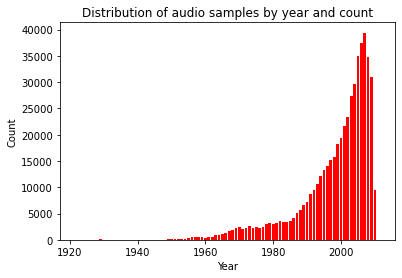

In [64]:
years = y.unique()
num_samples_per_year = dict(y.value_counts())
counts_ordered = [num_samples_per_year[year] for year in years]
plt.bar(years, counts_ordered, color='red')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of audio samples by year and count')

## Split Balanced Data into Train and Test

In [65]:
X_train = X.iloc[0:463715, :].to_numpy()
y_train = y.iloc[0:463715].to_numpy()

X_test = X.iloc[463715:, :].to_numpy()
y_test = y.iloc[463715:].to_numpy()

## Preprocessing

In [66]:
scaler = MinMaxScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Fitting Models Without  Dimensionality Reduction

In [67]:
kf = KFold(n_splits=5)
scoring = 'neg_mean_squared_error'
regressors_no_dr={'linear':None,'ridge':None,'lasso':None, 'xgboost':None, 'adaboost':None, 'bagging':None}
scores_no_dr = []
fit_times_no_dr = []
cross_val_times_no_dr = []

In [68]:
regressors_no_dr['linear'] = LinearRegression()
start_fit = time.time()
regressors_no_dr['linear'].fit(X_train, y_train)
end_fit = time.time()
fit_elapsed = end_fit - start_fit
print('Linear fit time: ' + str(fit_elapsed))
fit_times_no_dr.append(fit_elapsed)

start_cv = time.time()
cv_score = cross_val_score(regressors_no_dr['linear'], X_train, y_train, cv=kf, scoring=scoring)
end_cv = time.time()
cv_elapsed = end_cv - start_cv
print('Linear Cross Val time: ' + str(cv_elapsed))
cross_val_times_no_dr.append(cv_elapsed)

print('Linear Cross Val Score: ' + str(-1 * cv_score.mean()))
scores_no_dr.append(-1 * cv_score.mean())

Linear fit time: 0.9306864738464355
Linear Cross Val time: 4.785707473754883
Linear Cross Val Score: 91.4290277380091


In [69]:
regressors_no_dr['ridge'] = Ridge()
start_fit = time.time()
regressors_no_dr['ridge'].fit(X_train, y_train)
end_fit = time.time()
fit_elapsed = end_fit - start_fit
print('Ridge fit time: ' + str(fit_elapsed))
fit_times_no_dr.append(fit_elapsed)

start_cv = time.time()
cv_score = cross_val_score(regressors_no_dr['ridge'], X_train, y_train, cv=kf, scoring=scoring)
end_cv = time.time()
cv_elapsed = end_cv - start_cv
print('Ridge Cross Val time: ' + str(cv_elapsed))
cross_val_times_no_dr.append(cv_elapsed)

print('Ridge Cross Val Score: ' + str(-1 * cv_score.mean()))
scores_no_dr.append(-1 * cv_score.mean())

Ridge fit time: 0.30466198921203613
Ridge Cross Val time: 1.7212939262390137
Ridge Cross Val Score: 91.42775469990443


In [70]:
regressors_no_dr['lasso'] = Lasso()
start_fit = time.time()
regressors_no_dr['lasso'].fit(X_train, y_train)
end_fit = time.time()
fit_elapsed = end_fit - start_fit
print('Lasso fit time: ' + str(fit_elapsed))
fit_times_no_dr.append(fit_elapsed)

start_cv = time.time()
cv_score = cross_val_score(regressors_no_dr['lasso'], X_train, y_train, cv=kf, scoring=scoring)
end_cv = time.time()
cv_elapsed = end_cv - start_cv
print('Lasso Cross Val time: ' + str(cv_elapsed))
cross_val_times_no_dr.append(cv_elapsed)

print('Lasso Cross Val Score: ' + str(-1 * cv_score.mean()))
scores_no_dr.append(-1 * cv_score.mean())

Lasso fit time: 0.4220402240753174
Lasso Cross Val time: 3.0977790355682373
Lasso Cross Val Score: 119.70589580324604


In [71]:
regressors_no_dr['xgboost'] = xgb.XGBRegressor()
start_fit = time.time()
regressors_no_dr['xgboost'].fit(X_train, y_train)
end_fit = time.time()
fit_elapsed = end_fit - start_fit
print('XGB fit time: ' + str(fit_elapsed))
fit_times_no_dr.append(fit_elapsed)

start_cv = time.time()
cv_score = cross_val_score(regressors_no_dr['xgboost'], X_train, y_train, cv=kf, scoring=scoring)
end_cv = time.time()
cv_elapsed = end_cv - start_cv
print('XGB Cross Val time: ' + str(cv_elapsed))
cross_val_times_no_dr.append(cv_elapsed)

print('XGB Cross Val Score: ' + str(-1 * cv_score.mean()))
scores_no_dr.append(-1 * cv_score.mean())

XGB fit time: 94.98251914978027
XGB Cross Val time: 402.94389939308167
XGB Cross Val Score: 82.0975079652743


In [72]:
regressors_no_dr['adaboost'] = AdaBoostRegressor()
start_fit = time.time()
regressors_no_dr['adaboost'].fit(X_train, y_train)
end_fit = time.time()
fit_elapsed = end_fit - start_fit
print('Adaboost fit time: ' + str(fit_elapsed))
fit_times_no_dr.append(fit_elapsed)

start_cv = time.time()
cv_score = cross_val_score(regressors_no_dr['adaboost'], X_train, y_train, cv=kf, scoring=scoring)
end_cv = time.time()
cv_elapsed = end_cv - start_cv
print('Adaboost Cross Val time: ' + str(cv_elapsed))
cross_val_times_no_dr.append(cv_elapsed)

print('Adaboost Cross Val Score: ' + str(-1 * cv_score.mean()))
scores_no_dr.append(-1 * cv_score.mean())

Adaboost fit time: 350.2642512321472
Adaboost Cross Val time: 1248.851053237915
Adaboost Cross Val Score: 162.34528628693278


In [73]:
regressors_no_dr['bagging'] = BaggingRegressor()
start_fit = time.time()
regressors_no_dr['bagging'].fit(X_train, y_train)
end_fit = time.time()
fit_elapsed = end_fit - start_fit
print('Bagging fit time: ' + str(fit_elapsed))
fit_times_no_dr.append(fit_elapsed) 

start_cv = time.time()
cv_score = cross_val_score(regressors_no_dr['bagging'], X_train, y_train, cv=kf, scoring=scoring)
end_cv = time.time()
cv_elapsed = end_cv - start_cv
print('Bagging Cross Val time: ' + str(cv_elapsed))
cross_val_times_no_dr.append(cv_elapsed)

print('Bagging Cross Val Score: ' + str(-1 * cv_score.mean()))
scores_no_dr.append(-1 * cv_score.mean())

Bagging fit time: 745.2944984436035
Bagging Cross Val time: 2485.3423709869385
Bagging Cross Val Score: 95.4332445283801


## Plot Fit Times

<BarContainer object of 6 artists>

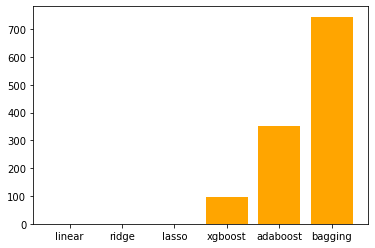

In [74]:
models = [key for key in regressors_no_dr.keys() if regressors_no_dr[key] is not None]
plt.bar(models, fit_times_no_dr, color='orange') 

## Plot Cross Val Times

<BarContainer object of 6 artists>

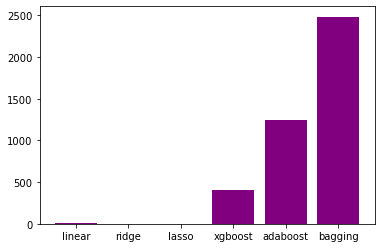

In [75]:
models = [key for key in regressors_no_dr.keys() if regressors_no_dr[key] is not None]
plt.bar(models, cross_val_times_no_dr, color='purple')

### Plot Mean Squared Error Bar Chart

<BarContainer object of 6 artists>

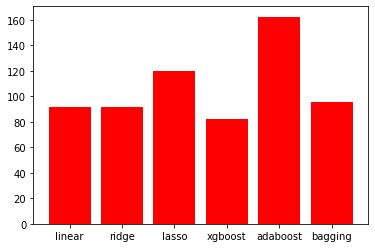

In [76]:
models = [key for key in regressors_no_dr.keys() if regressors_no_dr[key] is not None]
plt.bar(models, scores_no_dr, color='red')

In [77]:
test_scores_no_dr = []
for key in regressors_no_dr.keys():
    curr_model = regressors_no_dr[key]
    if curr_model is not None:
        test_scores_no_dr.append(curr_model.score(X_test, y_test))

<BarContainer object of 6 artists>

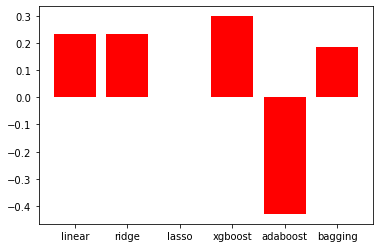

In [78]:
models = [key for key in regressors_no_dr.keys() if regressors_no_dr[key] is not None]
plt.bar(models, test_scores_no_dr, color='red')

## Dimensionality Reduction

In [79]:
pca_dr = PCA(n_components=0.85)
pca_dr.fit(X_train)
X_train = pca_dr.transform(X_train)
X_test = pca_dr.transform(X_test)

## Fitting Models with Dimensionality Reduction

In [80]:
kf = KFold(n_splits=5)
scoring = 'neg_mean_squared_error'
regressors={'linear':None,'ridge':None,'lasso':None, 'xgboost':None, 'adaboost':None, 'bagging':None}
scores = []
fit_times = []
cross_val_times = []

In [81]:
regressors['linear'] = LinearRegression()
start_fit = time.time()
regressors['linear'].fit(X_train, y_train)
end_fit = time.time()
fit_elapsed = end_fit - start_fit
print('Linear fit time: ' + str(fit_elapsed))
fit_times.append(fit_elapsed)

start_cv = time.time()
cv_score = cross_val_score(regressors['linear'], X_train, y_train, cv=kf, scoring=scoring)
end_cv = time.time()
cv_elapsed = end_cv - start_cv
print('Linear Cross Val time: ' + str(cv_elapsed))
cross_val_times.append(cv_elapsed)

print('Linear Cross Val Score: ' + str(-1 * cv_score.mean()))
scores.append(-1 * cv_score.mean())

Linear fit time: 0.3125491142272949
Linear Cross Val time: 1.4843175411224365
Linear Cross Val Score: 94.43800701487991


In [82]:
regressors['ridge'] = Ridge()
start_fit = time.time()
regressors['ridge'].fit(X_train, y_train)
end_fit = time.time()
fit_elapsed = end_fit - start_fit
print('Ridge fit time: ' + str(fit_elapsed))
fit_times.append(fit_elapsed)

start_cv = time.time()
cv_score = cross_val_score(regressors['ridge'], X_train, y_train, cv=kf, scoring=scoring)
end_cv = time.time()
cv_elapsed = end_cv - start_cv
print('Ridge Cross Val time: ' + str(cv_elapsed))
cross_val_times.append(cv_elapsed)

print('Ridge Cross Val Score: ' + str(-1 * cv_score.mean()))
scores.append(-1 * cv_score.mean())

Ridge fit time: 0.09559273719787598
Ridge Cross Val time: 0.6270849704742432
Ridge Cross Val Score: 94.43789628811642


In [83]:
regressors['lasso'] = Lasso()
start_fit = time.time()
regressors['lasso'].fit(X_train, y_train)
end_fit = time.time()
fit_elapsed = end_fit - start_fit
print('Lasso fit time: ' + str(fit_elapsed))
fit_times.append(fit_elapsed)

start_cv = time.time()
cv_score = cross_val_score(regressors['lasso'], X_train, y_train, cv=kf, scoring=scoring)
end_cv = time.time()
cv_elapsed = end_cv - start_cv
print('Lasso Cross Val time: ' + str(cv_elapsed))
cross_val_times.append(cv_elapsed)

print('Lasso Cross Val Score: ' + str(-1 * cv_score.mean()))
scores.append(-1 * cv_score.mean())

Lasso fit time: 0.20563030242919922
Lasso Cross Val time: 1.0577306747436523
Lasso Cross Val Score: 119.70589580324604


In [84]:
regressors['xgboost'] = xgb.XGBRegressor()
start_fit = time.time()
regressors['xgboost'].fit(X_train, y_train)
end_fit = time.time()
fit_elapsed = end_fit - start_fit
print('XGB fit time: ' + str(fit_elapsed))
fit_times.append(fit_elapsed)

start_cv = time.time()
cv_score = cross_val_score(regressors['xgboost'], X_train, y_train, cv=kf, scoring=scoring)
end_cv = time.time()
cv_elapsed = end_cv - start_cv
print('XGB Cross Val time: ' + str(cv_elapsed))
cross_val_times.append(cv_elapsed)

print('XGB Cross Val Score: ' + str(-1 * cv_score.mean()))
scores.append(-1 * cv_score.mean())

XGB fit time: 37.72370886802673
XGB Cross Val time: 157.3446910381317
XGB Cross Val Score: 84.82655267265176


In [85]:
regressors['adaboost'] = AdaBoostRegressor()
start_fit = time.time()
regressors['adaboost'].fit(X_train, y_train)
end_fit = time.time()
fit_elapsed = end_fit - start_fit
print('Adaboost fit time: ' + str(fit_elapsed))
fit_times.append(fit_elapsed)
 
start_cv = time.time()
cv_score = cross_val_score(regressors['adaboost'], X_train, y_train, cv=kf, scoring=scoring)
end_cv = time.time()
cv_elapsed = end_cv - start_cv
print('Adaboost Cross Val time: ' + str(cv_elapsed))
cross_val_times.append(cv_elapsed)

print('Adaboost Cross Val Score: ' + str(-1 * cv_score.mean()))
scores.append(-1 * cv_score.mean())

Adaboost fit time: 118.34328627586365
Adaboost Cross Val time: 507.07299876213074
Adaboost Cross Val Score: 174.19274605662866


In [86]:
regressors['bagging'] = BaggingRegressor()
start_fit = time.time()
regressors['bagging'].fit(X_train, y_train)
end_fit = time.time()
fit_elapsed = end_fit - start_fit
print('Bagging fit time: ' + str(fit_elapsed))
fit_times.append(fit_elapsed)
  
start_cv = time.time()
cv_score = cross_val_score(regressors['bagging'], X_train, y_train, cv=kf, scoring=scoring)
end_cv = time.time()
cv_elapsed = end_cv - start_cv
print('Bagging Cross Val time: ' + str(cv_elapsed))
cross_val_times.append(cv_elapsed)

print('Bagging Cross Val Score: ' + str(-1 * cv_score.mean()))
scores.append(-1 * cv_score.mean())

Bagging fit time: 158.8324534893036
Bagging Cross Val time: 633.1727383136749
Bagging Cross Val Score: 96.88705201291023


## Plot Fit Times

<BarContainer object of 6 artists>

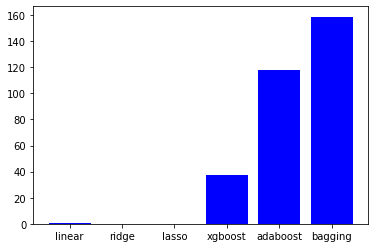

In [87]:
models = [key for key in regressors_no_dr.keys() if regressors_no_dr[key] is not None]
plt.bar(models, fit_times, color='blue')

## Plot Cross Val Times

<BarContainer object of 6 artists>

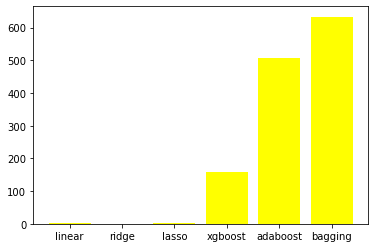

In [88]:
models = [key for key in regressors_no_dr.keys() if regressors_no_dr[key] is not None]
plt.bar(models, cross_val_times, color='yellow')

### Plot Mean Squared Error Bar Chart

<BarContainer object of 6 artists>

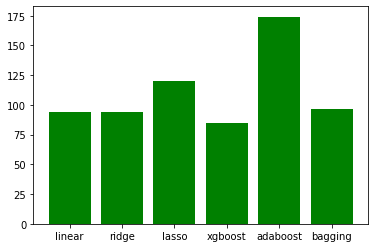

In [89]:
models = [key for key in regressors_no_dr.keys() if regressors_no_dr[key] is not None]
plt.bar(models, scores, color='green')

In [90]:
test_scores = []
for key in regressors.keys():
    curr_model = regressors[key]
    if curr_model is not None:
        test_scores.append(curr_model.score(X_test, y_test))

<BarContainer object of 6 artists>

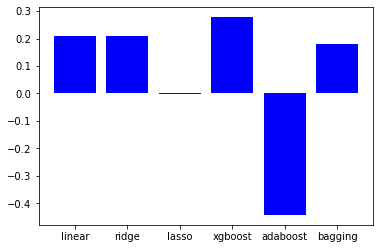

In [91]:
models = [key for key in regressors_no_dr.keys() if regressors_no_dr[key] is not None]
plt.bar(models, test_scores, color='blue')